In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import cmocean
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

# Read in dataset w/ scores

In [2]:
rrs_xds = xr.open_dataset('/glusteruser/awindled/ALL_NOBM_OASIM_data_2020_w_scores.nc', decode_times=False)
rrs_xds

<xarray.Dataset>
Dimensions:         (months: 12, lat: 234, lon: 288, wavelength: 401)
Coordinates:
  * months          (months) float32 0.0 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
  * lat             (lat) float32 -84.0 -83.33 -82.67 -82.0 ... 70.0 70.67 71.33
  * lon             (lon) float32 -180.0 -178.8 -177.5 ... 176.2 177.5 178.8
  * wavelength      (wavelength) int64 350 351 352 353 354 ... 747 748 749 750
    wv              (wavelength) int64 ...
Data variables: (12/55)
    tot             (months, lat, lon) float32 ...
    chl             (months, lat, lon) float32 ...
    dia             (months, lat, lon) float32 ...
    coc             (months, lat, lon) float32 ...
    cya             (months, lat, lon) float32 ...
    din             (months, lat, lon) float32 ...
    ...              ...
    PC_3            (months, lat, lon) float64 ...
    PC_4            (months, lat, lon) float64 ...
    PC_5            (months, lat, lon) float64 ...
    PC_6            (months, lat, lon) float64 ...
    PC_7            (months, lat, lon) float64 ...
    PC_8            (months, lat, lon) float64 ...

# Standardize env variables (values range from 0-1)

In [3]:
env_vars = ['pic', 'irn', 'rno', 'h', 'sil', 'dtc', 'cdc', 't', 's', 'par']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for i in range(len(env_vars)):
    foo = rrs_xds[env_vars[i]].values.reshape(12*234*288)
    foo = scaler.fit_transform(foo.reshape(-1, 1))
    rrs_xds[env_vars[i]].values = foo.reshape(12,234,288)

# Read in csv's that contain selected_features, coefs, and int for each phyto

In [4]:
tot = pd.read_csv('/glusteruser/awindled/tot.csv')
chl = pd.read_csv('/glusteruser/awindled/chl.csv')
dia = pd.read_csv('/glusteruser/awindled/dia.csv')
coc = pd.read_csv('/glusteruser/awindled/coc.csv')
cya = pd.read_csv('/glusteruser/awindled/cya.csv')
din = pd.read_csv('/glusteruser/awindled/din.csv')
pha = pd.read_csv('/glusteruser/awindled/pha.csv')

In [5]:
tot_envs = tot.selected_features.to_list()
tot_envs.extend(['tot', 'chl', 'dia', 'coc', 'cya', 'din', 'pha'])
tot_envs

rrs_xds_tot = rrs_xds[tot_envs]
rrs_xds_tot_stacked = rrs_xds_tot.stack(z=("lat", "lon", "months"))

pred_tot = []
for i in range(len(rrs_xds_tot_stacked.tot)):
    foo_all = []
    if rrs_xds_tot_stacked.tot.values[i] > 0.01:
        for j in range(len(tot.coefs)):
            foo = tot.coefs[j] * rrs_xds_tot_stacked[tot.selected_features[j]][i].values
            foo_all.append(foo)
            phyto = np.mean(tot.int) + np.sum(foo_all)
    else:
        phyto = np.nan
    pred_tot.append(phyto)
print(len(pred_tot))

808704


(array([1.00000e+00, 0.00000e+00, 1.00000e+00, 2.47900e+03, 6.43770e+04,
        1.97413e+05, 1.66302e+05, 4.03370e+04, 1.81200e+03, 3.90000e+02]),
 array([-3.3616678 , -2.94198412, -2.52230043, -2.10261675, -1.68293306,
        -1.26324938, -0.84356569, -0.42388201, -0.00419832,  0.41548537,
         0.83516905]),
 <BarContainer object of 10 artists>)

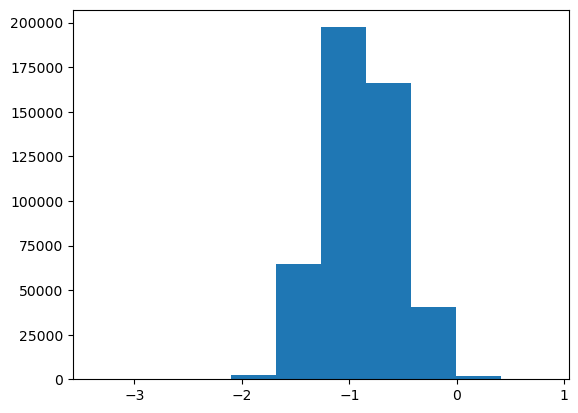

In [177]:
plt.hist(np.array(pred_tot))

In [6]:
chl_envs = chl.selected_features.to_list()
chl_envs.extend(['tot', 'chl', 'dia', 'coc', 'cya', 'din', 'pha'])
chl_envs

rrs_xds_chl = rrs_xds[chl_envs]
rrs_xds_chl_stacked = rrs_xds_chl.stack(z=("lat", "lon", "months"))

pred_chl = []
for i in range(len(rrs_xds_chl_stacked.chl)):
    foo_all = []
    if rrs_xds_chl_stacked.chl.values[i] > 0.01:
        for j in range(len(chl.coefs)):
            foo = chl.coefs[j] * rrs_xds_chl_stacked[chl.selected_features[j]][i].values
            foo_all.append(foo)
            phyto = np.mean(chl.int) + np.sum(foo_all)
    else:
        phyto = np.nan
    pred_chl.append(phyto)
print(len(pred_chl))

808704


(array([1.3400e+02, 8.5016e+04, 7.1595e+04, 9.2900e+02, 2.6000e+01,
        7.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-2.87739528, -2.08944487, -1.30149446, -0.51354405,  0.27440636,
         1.06235677,  1.85030718,  2.63825759,  3.426208  ,  4.21415841,
         5.00210882]),
 <BarContainer object of 10 artists>)

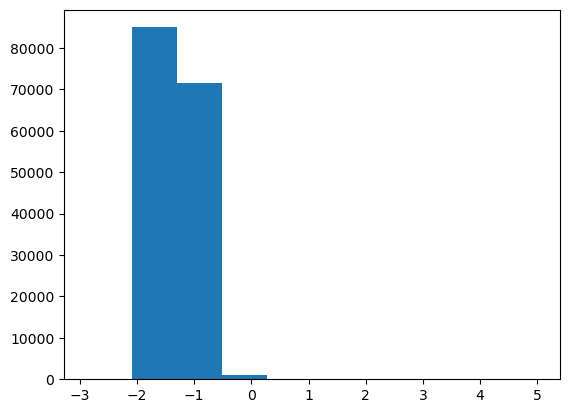

In [176]:
plt.hist(np.array(pred_chl))

In [110]:
dia_envs = dia.selected_features.to_list()
dia_envs.extend(['tot', 'chl', 'dia', 'coc', 'cya', 'din', 'pha'])
dia_envs

rrs_xds_dia = rrs_xds[dia_envs]
rrs_xds_dia_stacked = rrs_xds_dia.stack(z=("lat", "lon", "months"))

pred_dia = []
for i in range(len(rrs_xds_dia_stacked.dia)):
    foo_all = []
    if rrs_xds_dia_stacked.dia.values[i] > 0.01:
        for j in range(len(dia.coefs)):
            foo = dia.coefs[j] * rrs_xds_dia_stacked[dia.selected_features[j]][i].values
            foo_all.append(foo)
            phyto = np.mean(dia.int) + np.sum(foo_all)
    else:
        phyto = np.nan
    pred_dia.append(phyto)
print(len(pred_dia))


808704


In [172]:
rrs_xds_tot_stacked = rrs_xds_tot_stacked.assign(pred_tot=("z", 10**np.array(pred_tot)),
                                                pred_chl=("z", 10**np.array(pred_chl)), pred_dia=("z", 10**np.array(pred_dia)))
rrs_xds_tot_stacked

<xarray.Dataset>
Dimensions:        (z: 808704)
Coordinates:
  * z              (z) object MultiIndex
  * lat            (z) float32 -84.0 -84.0 -84.0 -84.0 ... 71.33 71.33 71.33
  * lon            (z) float32 -180.0 -180.0 -180.0 -180.0 ... 178.8 178.8 178.8
  * months         (z) float32 0.0 1.0 2.0 3.0 4.0 5.0 ... 7.0 8.0 9.0 10.0 11.0
Data variables: (12/21)
    pic            (z) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    h              (z) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    cdc            (z) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    t              (z) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    aph440_aph676  (z) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    aph440_ap440   (z) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    ...             ...
    cya            (z) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    din            (z) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    pha            (z) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    pred_tot       (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pred_chl       (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pred_dia       (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [180]:
rrs_xds_tot_stacked.chl.max()

<xarray.DataArray 'chl' ()>
array(0.71648592)

In [179]:
rrs_xds_tot_stacked.tot.max()

<xarray.DataArray 'tot' ()>
array(5.10559702)

Text(0, 0.5, 'Predicted')

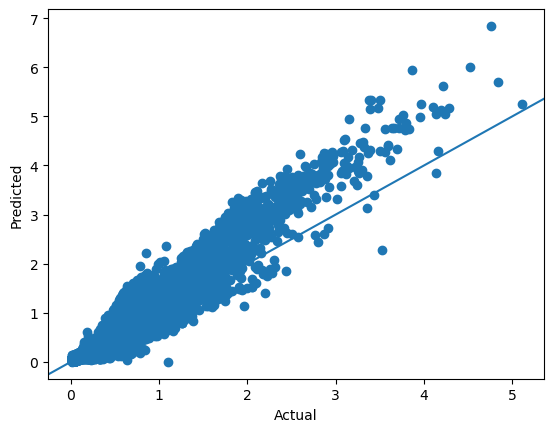

<Figure size 640x480 with 0 Axes>

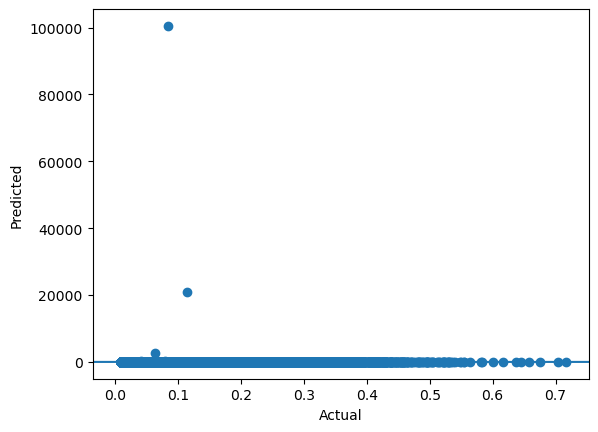

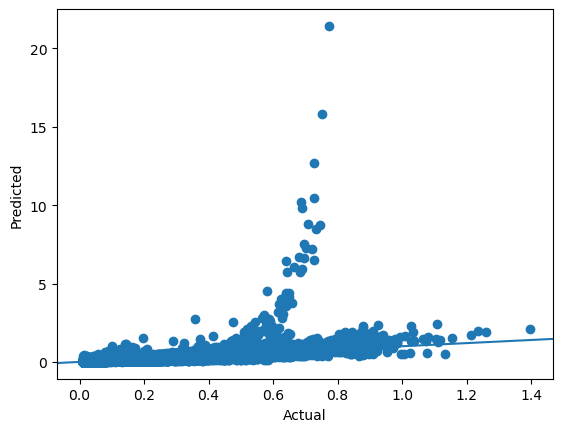

In [173]:
fig, ax = plt.subplots()

ax.scatter(rrs_xds_tot_stacked.tot, rrs_xds_tot_stacked.pred_tot)
ax.axline((0, 0), slope=1)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

plt.figure(2)
fig, ax = plt.subplots()
ax.scatter(rrs_xds_tot_stacked.chl, rrs_xds_tot_stacked.pred_chl)
ax.axline((0, 0), slope=1)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

plt.figure(3)
fig, ax = plt.subplots()
ax.scatter(rrs_xds_tot_stacked.dia, rrs_xds_tot_stacked.pred_dia)
ax.axline((0, 0), slope=1)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

In [149]:
foo = rrs_xds_tot_stacked.unstack()
foo

<xarray.Dataset>
Dimensions:        (lat: 234, lon: 288, months: 12)
Coordinates:
  * lat            (lat) float32 -84.0 -83.33 -82.67 -82.0 ... 70.0 70.67 71.33
  * lon            (lon) float32 -180.0 -178.8 -177.5 ... 176.2 177.5 178.8
  * months         (months) float32 0.0 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
Data variables: (12/21)
    pic            (lat, lon, months) float32 nan nan nan nan ... nan nan nan
    h              (lat, lon, months) float32 nan nan nan nan ... nan nan nan
    cdc            (lat, lon, months) float32 nan nan nan nan ... nan nan nan
    t              (lat, lon, months) float32 nan nan nan nan ... nan nan nan
    aph440_aph676  (lat, lon, months) float32 nan nan nan nan ... nan nan nan
    aph440_ap440   (lat, lon, months) float32 nan nan nan nan ... nan nan nan
    ...             ...
    cya            (lat, lon, months) float32 nan nan nan nan ... nan nan nan
    din            (lat, lon, months) float32 nan nan nan nan ... nan nan nan
    pha            (lat, lon, months) float32 nan nan nan nan ... nan nan nan
    pred_tot       (lat, lon, months) float64 nan nan nan nan ... nan nan nan
    pred_chl       (lat, lon, months) float64 nan nan nan nan ... nan nan nan
    pred_dia       (lat, lon, months) float64 nan nan nan nan ... nan nan nan

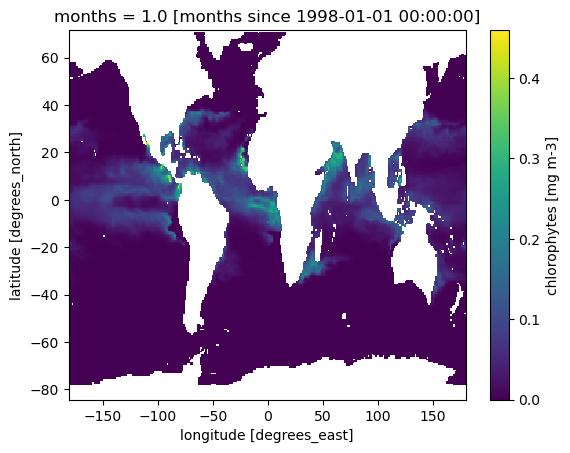

In [150]:
foo.chl[:,:,1].plot()

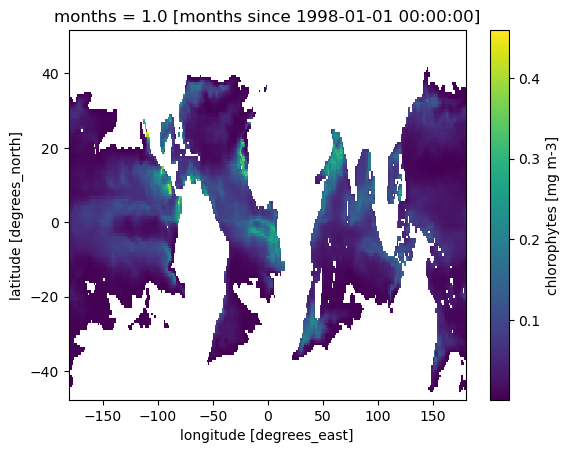

In [161]:
bar = foo['chl'].where(foo['chl']>0.001, drop=True)
bar[:,:,1].plot()

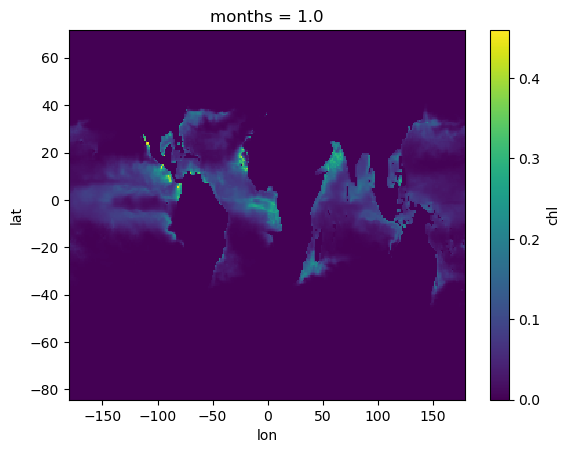

In [147]:
xr.where(foo.chl>0,foo.chl,0)[:,:,1].plot()

In [135]:
foo.chl.min()

<xarray.DataArray 'chl' ()>
array(0.)

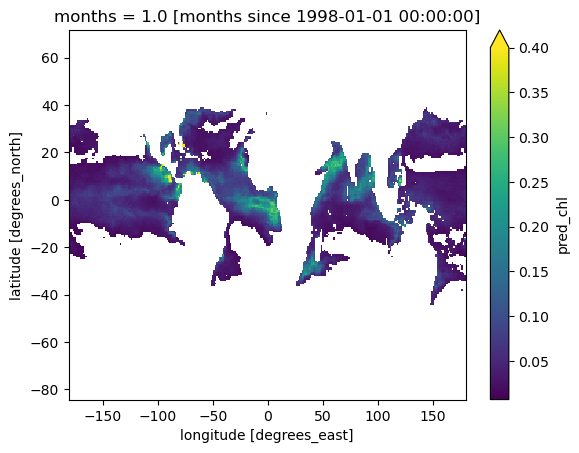

In [134]:
foo.pred_chl[:,:,1].plot(vmax=0.4)